In [24]:
import os
print(os.getcwd())


C:\Users\ACER\DataScience


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import f_oneway
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, precision_recall_curve,
    confusion_matrix, ConfusionMatrixDisplay, classification_report,
    average_precision_score
)
from scipy.stats import randint, uniform
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

df = pd.read_csv('heart_disease.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

# Heatmap

C:\Users\ACER\AppData\Local\Temp\ipykernel_1692\3387270072.py:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df[col]):
C:\Users\ACER\AppData\Local\Temp\ipykernel_1692\3387270072.py:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df[col]):
C:\Users\ACER\AppData\Local\Temp\ipykernel_1692\3387270072.py:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df[col]):
C:\Users\ACER\AppData\Local\Temp\ipykernel_1692\3387270072.py:6: DeprecationWarning: is_categorical_dtype is deprecated and will b

                           Age    Gender  Blood Pressure  Cholesterol Level  \
Age                   1.000000 -0.010997       -0.020781           0.011371   
Gender               -0.010997  1.000000       -0.004326          -0.012202   
Blood Pressure       -0.020781 -0.004326        1.000000          -0.012026   
Cholesterol Level     0.011371 -0.012202       -0.012026           1.000000   
Exercise Habits      -0.002346  0.013707       -0.001042          -0.005312   
Smoking              -0.001088 -0.011685       -0.003414           0.008065   
Family Heart Disease -0.020320  0.000760        0.006143          -0.004390   
Diabetes              0.011855  0.006454        0.020399           0.004415   
BMI                   0.011229 -0.015365        0.005405           0.022002   
High Blood Pressure   0.000067  0.014618        0.011500          -0.007745   
Low HDL Cholesterol  -0.014923  0.006406       -0.002417          -0.004128   
High LDL Cholesterol  0.001780 -0.009218       -0.00

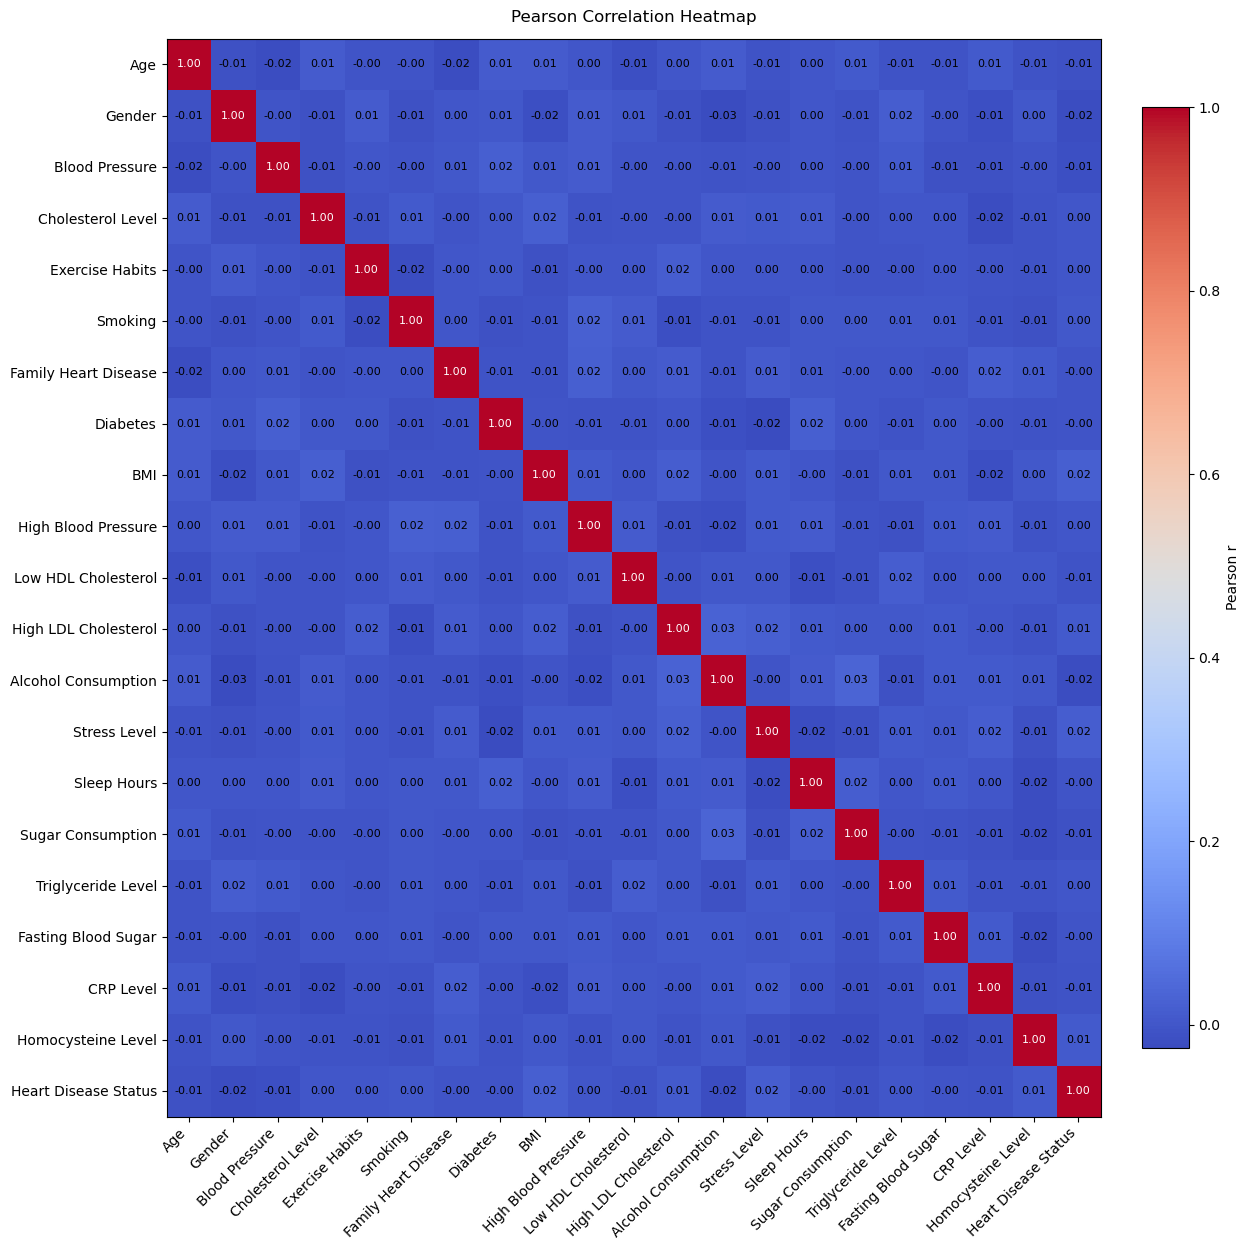

In [27]:
TARGET_COL = "Heart Disease Status"      

# 2) Label encode ALL categorical columns (including binary)
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df[col]):
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

# 3) Make sure target column is numeric
if not pd.api.types.is_numeric_dtype(df[TARGET_COL]):
    le = LabelEncoder()
    df[TARGET_COL] = le.fit_transform(df[TARGET_COL].astype(str))
    label_encoders[TARGET_COL] = le

# 4) Calculate Pearson correlation
corr = df.corr(method="pearson")
print(corr)

# 5) Show correlation of each feature with the target
print("\n=== Correlation with TARGET ===\n")
target_corr = corr[TARGET_COL].drop(labels=[TARGET_COL])
print(target_corr.sort_values(ascending=False).round(3))

# 6) Plot heatmap (Matplotlib only)
n = corr.shape[0]
figsize = max(8, min(0.6 * n, 20))
plt.figure(figsize=(figsize, figsize))

im = plt.imshow(corr.values, cmap='coolwarm', interpolation="nearest", aspect="auto")
plt.title("Pearson Correlation Heatmap", pad=12)
cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
cbar.set_label("Pearson r")

# Add tick labels
plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(np.arange(len(corr.columns)), corr.columns)

# Annotate correlation values
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        val = corr.values[i, j]
        color = "white" if abs(val) > 0.5 else "black"
        plt.text(j, i, f"{val:.2f}", ha="center", va="center", fontsize=8, color=color)

plt.tight_layout()
plt.savefig("correlation_heatmap", dpi=200, bbox_inches="tight")
plt.show()

# 7) Save correlation matrix
corr.round(3).to_csv("correlation_matrix.csv")

In [28]:
# ensure target is 0/1
if df[TARGET_COL].dtype == 'object':
    df[TARGET_COL] = (df[TARGET_COL].astype('category').cat.codes)

# choose numeric features only for point-biserial (works best when feature is numeric/ordinal)
num_cols = df.select_dtypes(include="number").columns.drop(TARGET_COL, errors="ignore")
pbs = {}
for c in num_cols:
    s = df[c].dropna()
    t = df.loc[s.index, TARGET_COL]
    r, p = pointbiserialr(t, s)
    pbs[c] = (r, p)

pbs_series = pd.Series({k: v[0] for k, v in pbs.items()}).sort_values(ascending=False)
print(pbs_series.round(3))

BMI                     0.020
Stress Level            0.016
Homocysteine Level      0.008
High LDL Cholesterol    0.007
Smoking                 0.003
Triglyceride Level      0.003
Cholesterol Level       0.003
High Blood Pressure     0.002
Exercise Habits         0.001
Fasting Blood Sugar    -0.002
Diabetes               -0.003
Sleep Hours            -0.004
Family Heart Disease   -0.005
CRP Level              -0.006
Low HDL Cholesterol    -0.007
Sugar Consumption      -0.009
Age                    -0.009
Blood Pressure         -0.014
Alcohol Consumption    -0.017
Gender                 -0.018
dtype: float64


In [29]:
def cramers_v(x, y):
    table = pd.crosstab(x, y)
    chi2 = chi2_contingency(table, correction=False)[0]
    n = table.sum().sum()
    r, k = table.shape
    phi2 = chi2 / n
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cat_cols = [c for c in df.columns if df[c].dtype == 'object' and c != TARGET_COL]
cv = {c: cramers_v(df[c], df[TARGET_COL]) for c in cat_cols}
print(pd.Series(cv).sort_values(ascending=False).round(3))

Series([], dtype: object)


C:\Users\ACER\AppData\Local\Temp\ipykernel_1692\1970536881.py:46: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if s.dtype == "object" or pd.api.types.is_categorical_dtype(s) or pd.api.types.is_bool_dtype(s):


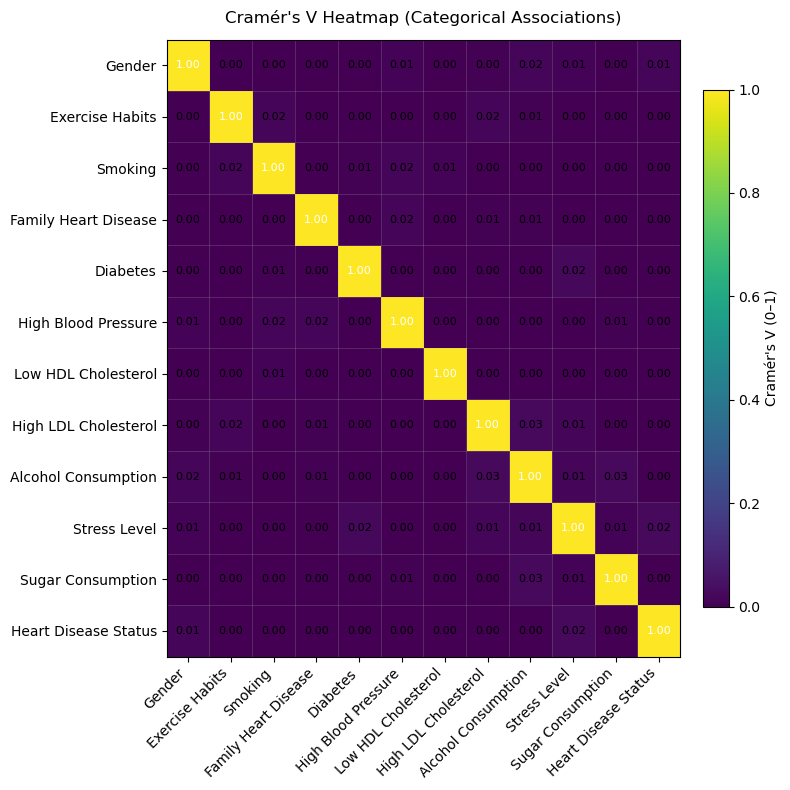


Saved:
- Heatmap image: cramers_v_heatmap.png
- Cramér's V matrix CSV: cramers_v_matrix.csv


In [30]:
# CRAMER'S V CODE

# ------------- CONFIG -------------
CSV_PATH = "heart_disease.csv"   # change if needed
SAVE_PNG = "cramers_v_heatmap.png"
SAVE_CSV = "cramers_v_matrix.csv"
INCLUDE_NUMERIC_WITH_FEW_LEVELS = True  # treat low-cardinality numerics as categorical
FEW_LEVELS_THRESHOLD = 10               # max unique values to be considered categorical
# -----------------------------------

# --- Cramér's V (bias-corrected) ---
def cramers_v(x, y):
    # drop NaNs pairwise
    mask = x.notna() & y.notna()
    x, y = x[mask], y[mask]
    if x.empty or y.empty:
        return np.nan

    table = pd.crosstab(x, y)
    if table.size == 0:
        return np.nan

    chi2 = chi2_contingency(table, correction=False)[0]
    n = table.values.sum()
    if n == 0:
        return np.nan

    r, k = table.shape
    phi2 = chi2 / n
    # bias correction (Bergsma)
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1)) if n > 1 else 0
    rcorr = r - ((r - 1) ** 2) / (n - 1) if n > 1 else r
    kcorr = k - ((k - 1) ** 2) / (n - 1) if n > 1 else k
    denom = min((kcorr - 1), (rcorr - 1))
    if denom <= 0:
        return np.nan
    return np.sqrt(phi2corr / denom)

# --- Load data ---
df = pd.read_csv(CSV_PATH)

# --- Pick categorical columns ---
cat_cols = []
for c in df.columns:
    s = df[c]
    if s.dtype == "object" or pd.api.types.is_categorical_dtype(s) or pd.api.types.is_bool_dtype(s):
        cat_cols.append(c)
    elif INCLUDE_NUMERIC_WITH_FEW_LEVELS and pd.api.types.is_integer_dtype(s) or pd.api.types.is_float_dtype(s):
        # treat low-cardinality numerics as categorical (common after label encoding)
        nunique = s.nunique(dropna=True)
        if nunique <= FEW_LEVELS_THRESHOLD:
            cat_cols.append(c)

# keep unique order
cat_cols = list(dict.fromkeys(cat_cols))

if len(cat_cols) < 2:
    raise ValueError("Not enough categorical-like columns found to compute a Cramér's V heatmap.")

# --- Compute pairwise Cramér's V matrix ---
m = len(cat_cols)
cv_mat = pd.DataFrame(np.nan, index=cat_cols, columns=cat_cols, dtype=float)

for i, c1 in enumerate(cat_cols):
    cv_mat.loc[c1, c1] = 1.0
    for j in range(i + 1, m):
        c2 = cat_cols[j]
        v = cramers_v(df[c1], df[c2])
        cv_mat.loc[c1, c2] = v
        cv_mat.loc[c2, c1] = v

# --- Save the matrix ---
cv_mat.round(3).to_csv(SAVE_CSV)

# --- Plot heatmap (Matplotlib only) ---
n = cv_mat.shape[0]
figsize = max(8, min(0.6 * n, 22))  # scale size with number of features
plt.figure(figsize=(figsize, figsize))

im = plt.imshow(cv_mat.values, interpolation="nearest", aspect="auto", vmin=0, vmax=1)
plt.title("Cramér's V Heatmap (Categorical Associations)", pad=12)
cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
cbar.set_label("Cramér's V (0–1)")

# ticks & labels
ticks = np.arange(len(cv_mat.columns))
plt.xticks(ticks, cv_mat.columns, rotation=45, ha="right")
plt.yticks(ticks, cv_mat.index)

# grid
ax = plt.gca()
ax.set_xticks(np.arange(-0.5, len(cv_mat.columns), 1), minor=True)
ax.set_yticks(np.arange(-0.5, len(cv_mat.index), 1), minor=True)
ax.grid(which="minor", linestyle="-", linewidth=0.5, alpha=0.3)
ax.tick_params(which="minor", bottom=False, left=False)

# annotations (optional; comment out if too dense)
for i in range(cv_mat.shape[0]):
    for j in range(cv_mat.shape[1]):
        val = cv_mat.values[i, j]
        if not np.isnan(val):
            color = "white" if val > 0.5 else "black"
            plt.text(j, i, f"{val:.2f}", ha="center", va="center", fontsize=8, color=color)

plt.tight_layout()
plt.savefig(SAVE_PNG, dpi=200, bbox_inches="tight")
plt.show()

print("\nSaved:")
print(f"- Heatmap image: {SAVE_PNG}")
print(f"- Cramér's V matrix CSV: {SAVE_CSV}")

# ANOVA

In [31]:
# ANOVA CODE
# -----------------------------
# CONFIG
CSV_PATH = "heart_disease.csv"
TARGET_COL = "Heart Disease Status"   # change to your actual target column name
# -----------------------------

# Load dataset
df = pd.read_csv(CSV_PATH)

# Ensure consistent column names
df.columns = df.columns.str.strip()

# Select numeric features only
numeric_features = df.select_dtypes(include=["number", "float64", "int64"]).columns.tolist()

# Remove target from features list (if numeric)
if TARGET_COL in numeric_features:
    numeric_features.remove(TARGET_COL)

anova_results = {}

# Run ANOVA for each numeric feature vs target
for col in numeric_features:
    groups = []
    for label in df[TARGET_COL].dropna().unique():
        vals = pd.to_numeric(df.loc[df[TARGET_COL] == label, col], errors="coerce").dropna()
        if not vals.empty:
            groups.append(vals)
    if len(groups) >= 2:  # ANOVA requires at least 2 groups
        f_stat, p_val = f_oneway(*groups)
        anova_results[col] = {"F-statistic": f_stat, "p-value": p_val}

# Convert to DataFrame for clean table view
anova_df = pd.DataFrame(anova_results).T.round(4)

# Display
print("\n=== ANOVA Results (Numeric Features vs Target) ===\n")
print(anova_df)

# Optional: Save to CSV
anova_df.to_csv("anova_results.csv")



=== ANOVA Results (Numeric Features vs Target) ===

                     F-statistic  p-value
Age                       0.8528   0.3558
Blood Pressure            1.9258   0.1653
Cholesterol Level         0.0732   0.7867
BMI                       3.8712   0.0491
Sleep Hours               0.1454   0.7030
Triglyceride Level        0.0851   0.7706
Fasting Blood Sugar       0.0504   0.8224
CRP Level                 0.3613   0.5478
Homocysteine Level        0.6877   0.4070


# Chi-Square

In [32]:
# CHI-SQUARE CODE
# -----------------------------
# CONFIG
CSV_PATH = "heart_disease.csv"
TARGET_COL = "Heart Disease Status"   # change if needed
# -----------------------------

# Load dataset
df = pd.read_csv(CSV_PATH)

# Ensure consistent column names
df.columns = df.columns.str.strip()

# Select categorical features (object, category, bool)
cat_features = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

# Remove target if it's categorical
if TARGET_COL in cat_features:
    cat_features.remove(TARGET_COL)

chi2_results = {}

for col in cat_features:
    contingency_table = pd.crosstab(df[col], df[TARGET_COL])
    if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:  # must be >1x1
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        chi2_results[col] = {"Chi2-statistic": chi2, "p-value": p, "dof": dof}

# Convert results into a DataFrame
chi2_df = pd.DataFrame(chi2_results).T.round(4)

# Display results
print("\n=== Chi-square Test Results (Categorical Features vs Target) ===\n")
print(chi2_df)

# Optional: Save to CSV
chi2_df.to_csv("chi_square_results.csv")



=== Chi-square Test Results (Categorical Features vs Target) ===

                      Chi2-statistic  p-value  dof
Gender                        2.6435   0.1040  1.0
Exercise Habits               0.4495   0.7987  2.0
Smoking                       0.0489   0.8250  1.0
Family Heart Disease          0.4307   0.5117  1.0
Diabetes                      0.0602   0.8062  1.0
High Blood Pressure           0.0401   0.8413  1.0
Low HDL Cholesterol           0.2762   0.5992  1.0
High LDL Cholesterol          0.5870   0.4436  1.0
Alcohol Consumption           1.8581   0.3949  2.0
Stress Level                  7.7257   0.0210  2.0
Sugar Consumption             1.3293   0.5145  2.0


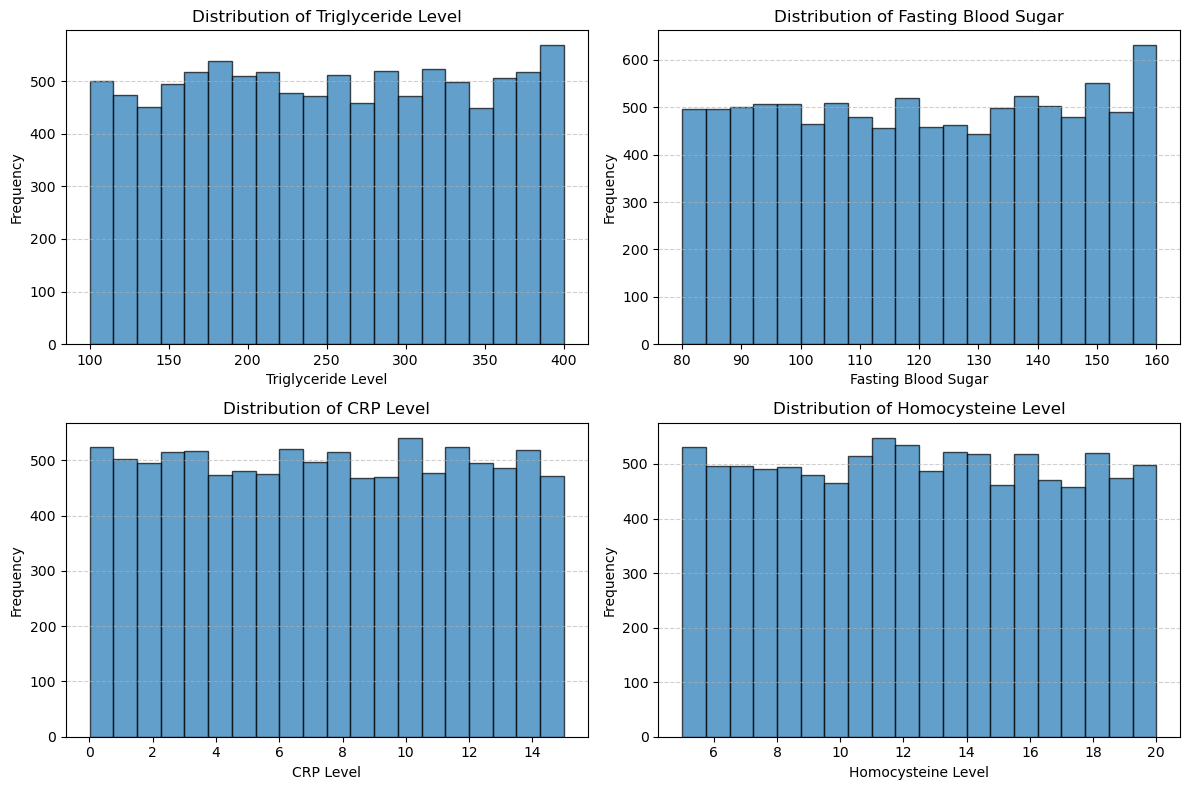

In [33]:
# HISTOGRAM
continuous_features = ["Triglyceride Level", "Fasting Blood Sugar", "CRP Level", "Homocysteine Level"]

fig, axes = plt.subplots(2, 2, figsize=(12,8))
axes = axes.flatten()

for i, col in enumerate(continuous_features):
  ax = axes[i]
  ax.hist(df[col].dropna(), bins=20, edgecolor='black', alpha=0.7)
  ax.set_title(f'Distribution of {col}')
  ax.set_xlabel(col)
  ax.set_ylabel('Frequency')
  ax.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.savefig("histograms.png", bbox_inches="tight")
plt.show()

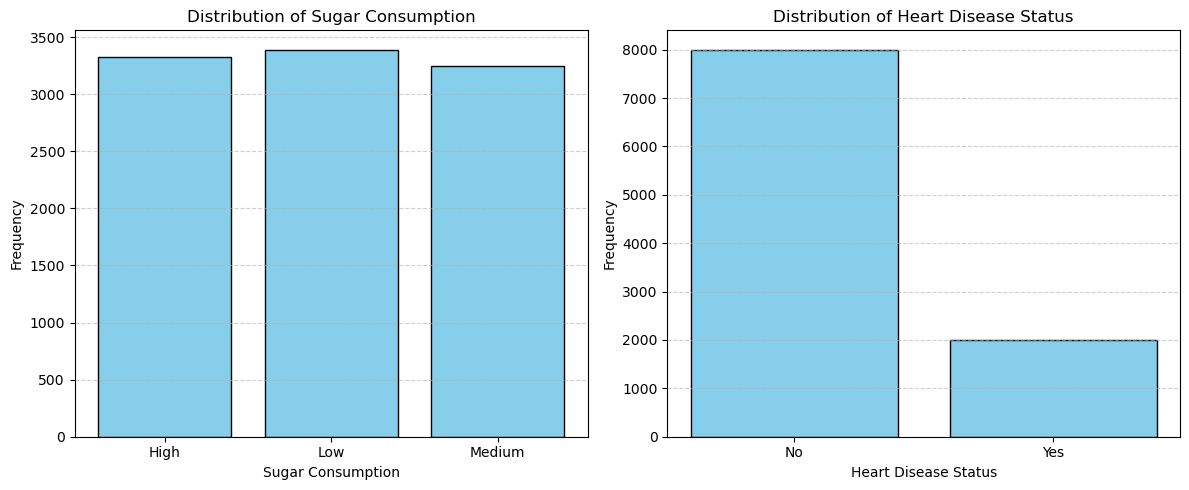

In [34]:
continuous_features = ["Sugar Consumption", "Heart Disease Status"]

fig, axes = plt.subplots(1, 2, figsize=(12,5))
axes = axes.flatten()

for i, col in enumerate(continuous_features):
  ax = axes[i]
  counts = df[col].value_counts().sort_index()
  ax.bar(counts.index.astype(str), counts.values, color="skyblue", edgecolor='black')
  ax.set_title(f'Distribution of {col}')
  ax.set_xlabel(col)
  ax.set_ylabel('Frequency')
  ax.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.savefig("bar_charts.png", bbox_inches="tight")
plt.show()

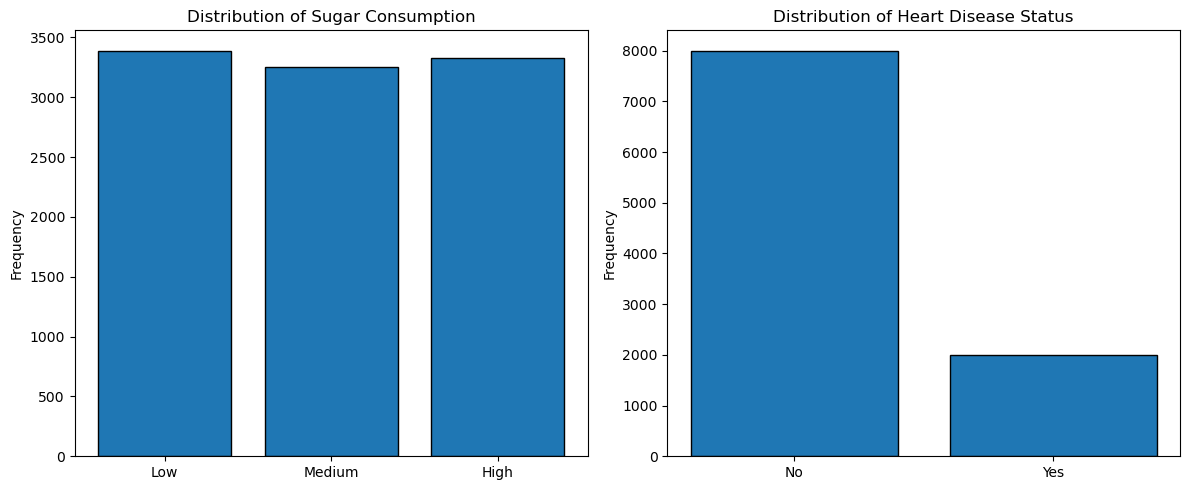

In [35]:
# Define columns
SUGAR_COL = "Sugar Consumption"
TARGET_COL = "Heart Disease Status"

# -----------------------------
# Prepare Sugar Consumption
# -----------------------------
sugar_order = ["Low", "Medium", "High"]
sugar_data = df[SUGAR_COL].dropna()
sugar_data = pd.Categorical(sugar_data, categories=sugar_order, ordered=True)
sugar_counts = pd.Series(sugar_data).value_counts().reindex(sugar_order)

# -----------------------------
# Prepare Heart Disease Status
# -----------------------------
hd_data = df[TARGET_COL].dropna()

# If numeric (0/1), convert to string for clearer labels
if pd.api.types.is_numeric_dtype(hd_data):
    hd_data = hd_data.astype(int).astype(str)

hd_counts = hd_data.value_counts()

# -----------------------------
# Plot both in one figure
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Sugar Consumption Bar Chart
axes[0].bar(sugar_counts.index.astype(str), sugar_counts.values, edgecolor="black")
axes[0].set_title("Distribution of Sugar Consumption")
axes[0].set_ylabel("Frequency")

# Heart Disease Status Bar Chart
axes[1].bar(hd_counts.index.astype(str), hd_counts.values, edgecolor="black")
axes[1].set_title("Distribution of Heart Disease Status")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.savefig("sugar_hd_barcharts.png", dpi=300, bbox_inches="tight")
plt.show()

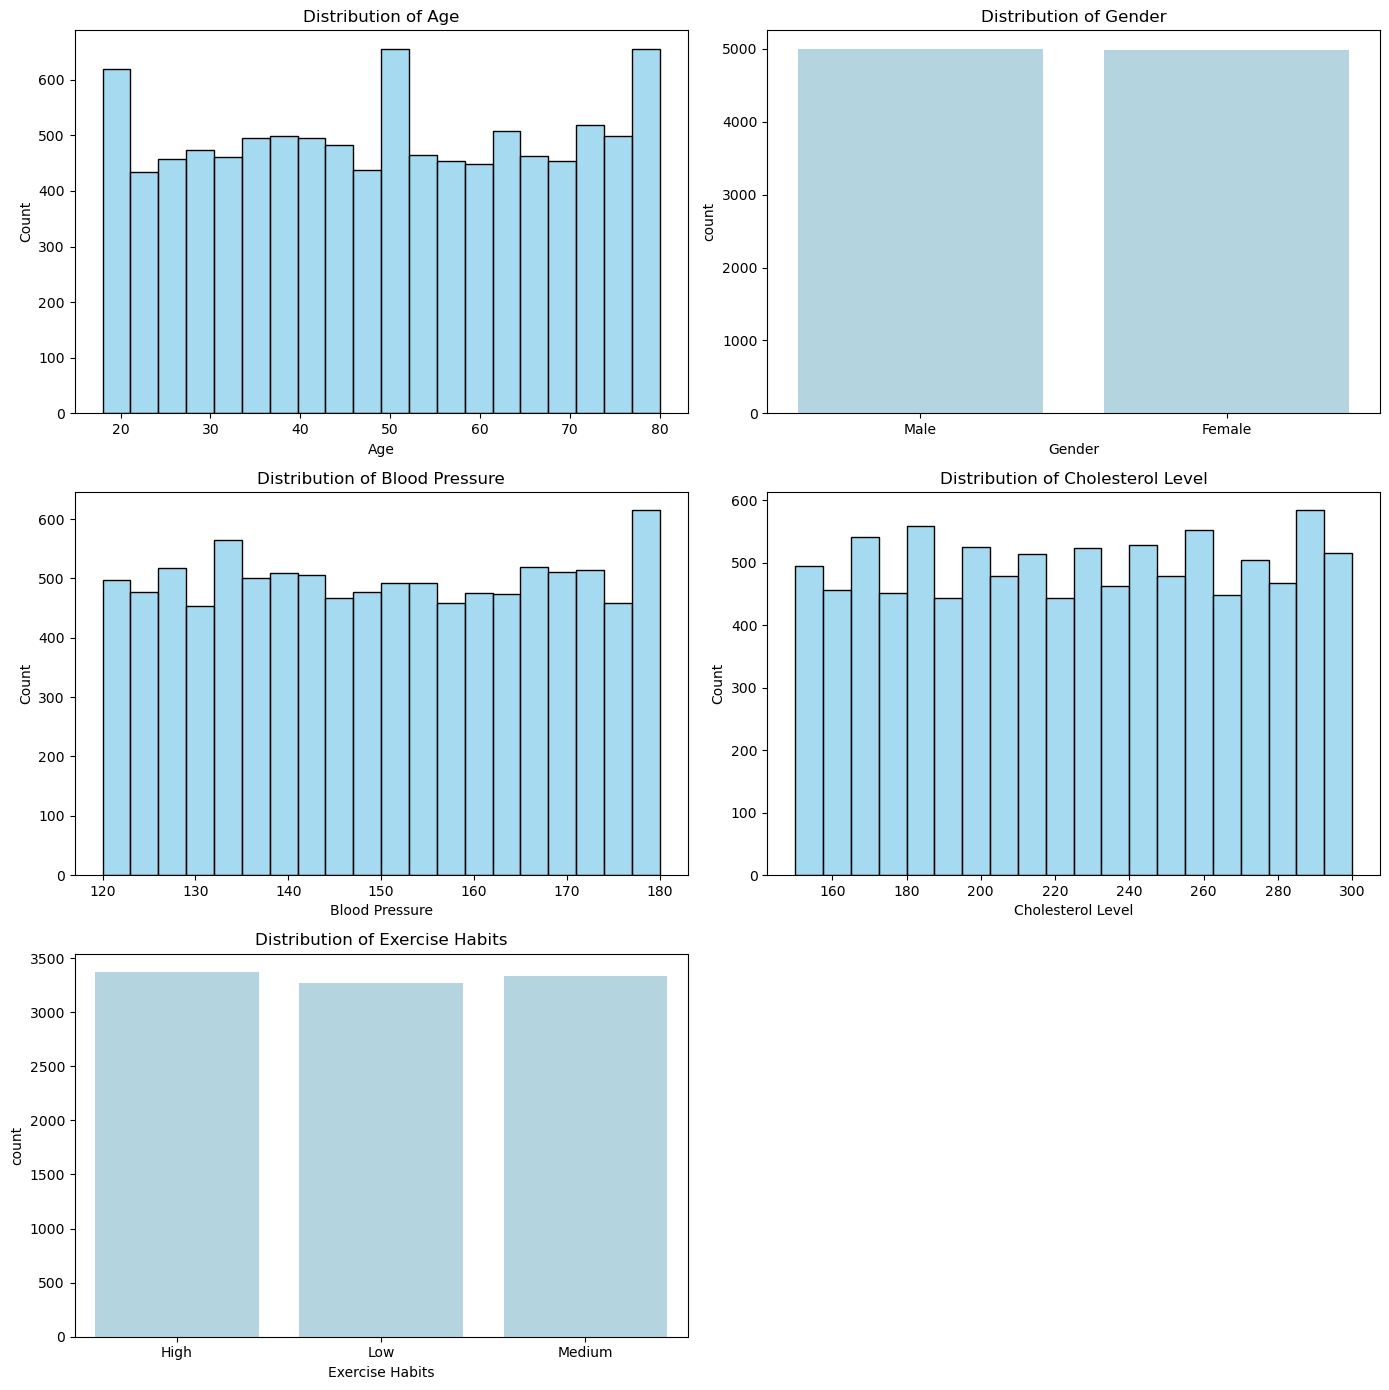

In [36]:
# Create subplots grid (3 rows × 2 columns → total 6 slots)
fig, axes = plt.subplots(3, 2, figsize=(14, 14))

# 1. Histogram of Age
sns.histplot(data=df, x="Age", bins=20, kde=False,
             color="skyblue", edgecolor="black", ax=axes[0,0])
axes[0,0].set_title("Distribution of Age")

# 2. Countplot of Gender
sns.countplot(x="Gender", data=df, color="lightblue", ax=axes[0,1])
axes[0,1].set_title("Distribution of Gender")

# 3. Histogram of Blood Pressure
sns.histplot(data=df, x="Blood Pressure", bins=20, kde=False,
             color="skyblue", edgecolor="black", ax=axes[1,0])
axes[1,0].set_title("Distribution of Blood Pressure")

# 4. Histogram of Cholesterol Level
sns.histplot(data=df, x="Cholesterol Level", bins=20, kde=False,
             color="skyblue", edgecolor="black", ax=axes[1,1])
axes[1,1].set_title("Distribution of Cholesterol Level")

# 5. Countplot of Exercise Habits
sns.countplot(x="Exercise Habits", data=df, color="lightblue", ax=axes[2,0])
axes[2,0].set_title("Distribution of Exercise Habits")

# Remove the empty last subplot (axes[2,1])
fig.delaxes(axes[2,1])

# Adjust layout to avoid overlap
plt.tight_layout()

# Save as a single PNG file
plt.savefig("all_histograms.png", dpi=300, bbox_inches="tight")

plt.show()

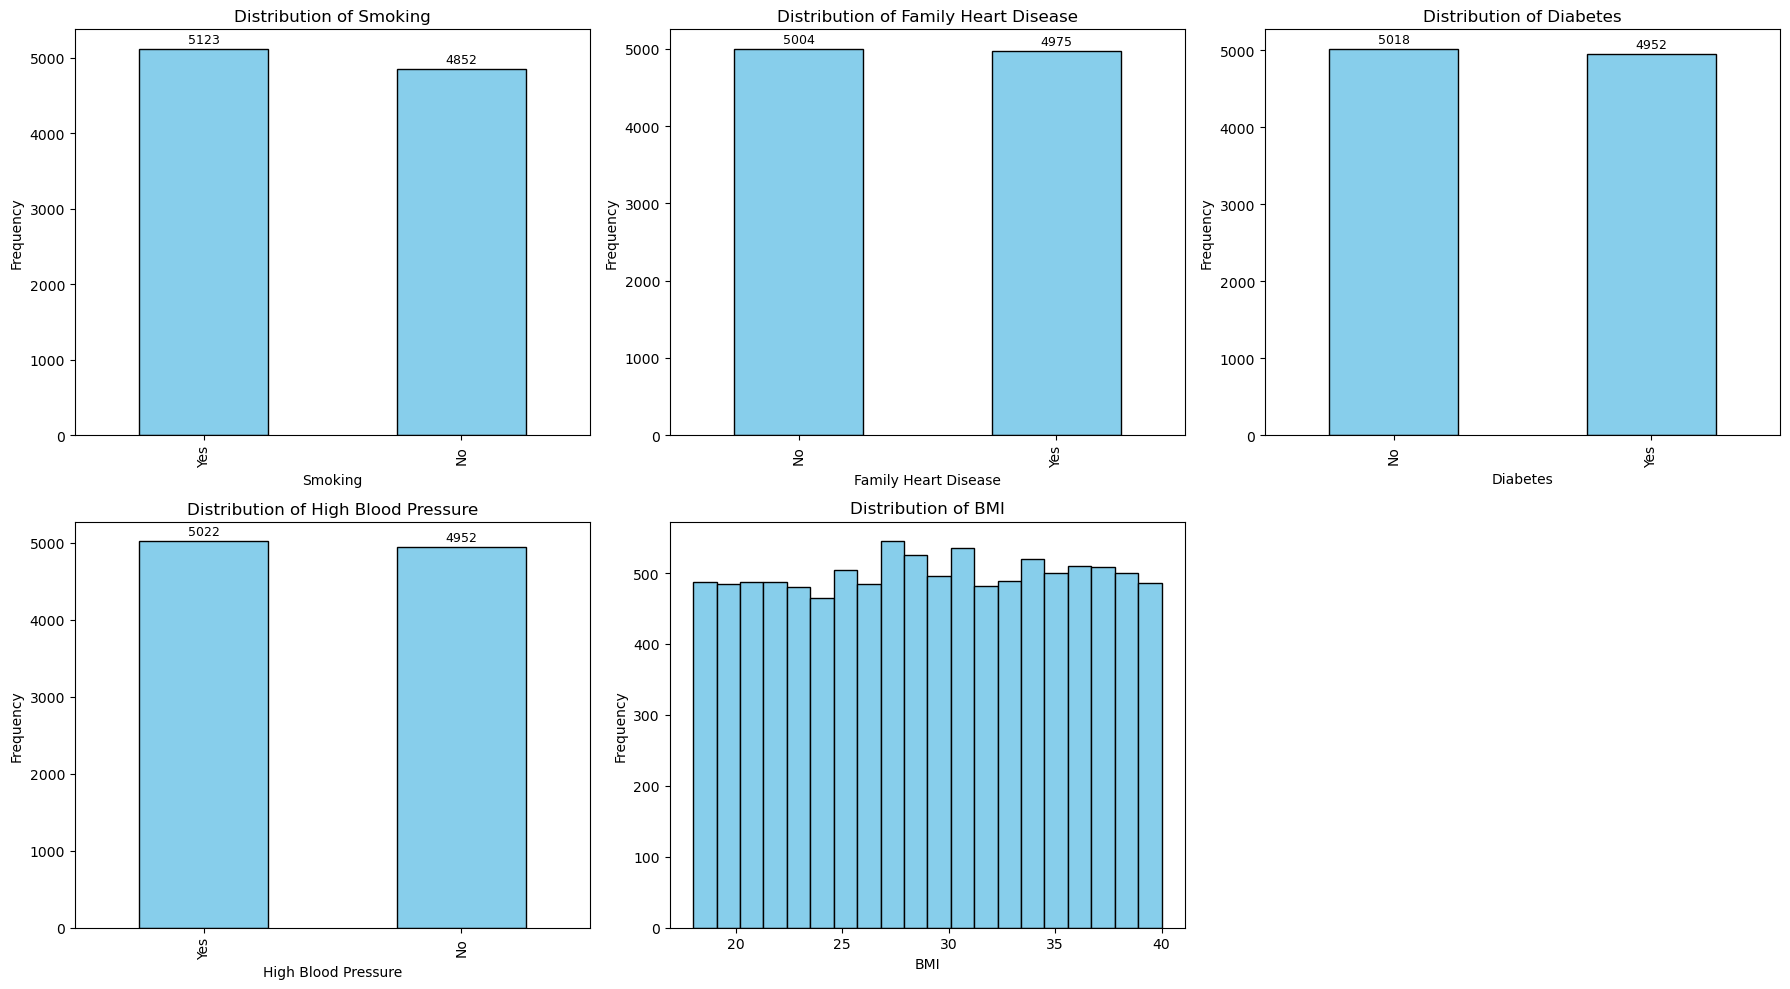

In [37]:
columns = ['Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure']

# Create subplot grid (2 rows × 3 columns = 6 spots, 5 used)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Plot categorical variables
for i, col in enumerate(columns):
    ax = df[col].value_counts().plot(
        kind='bar',
        ax=axes[i],
        edgecolor='black',
        color="skyblue"
    )

    # Add count labels
    for container in ax.containers:
        ax.bar_label(container, label_type="edge", fontsize=9, padding=2)

    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.set_title(f"Distribution of {col}")

# Plot BMI as histogram
ax = axes[len(columns)]
df['BMI'].plot(
    kind='hist',
    bins=20,
    ax=ax,
    color="skyblue",
    edgecolor='black'
)
ax.set_xlabel("BMI")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of BMI")

# Remove any unused subplot spaces (if grid > number of plots)
for j in range(len(columns)+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("All_Distributions.png", dpi=300, bbox_inches="tight")
plt.show()


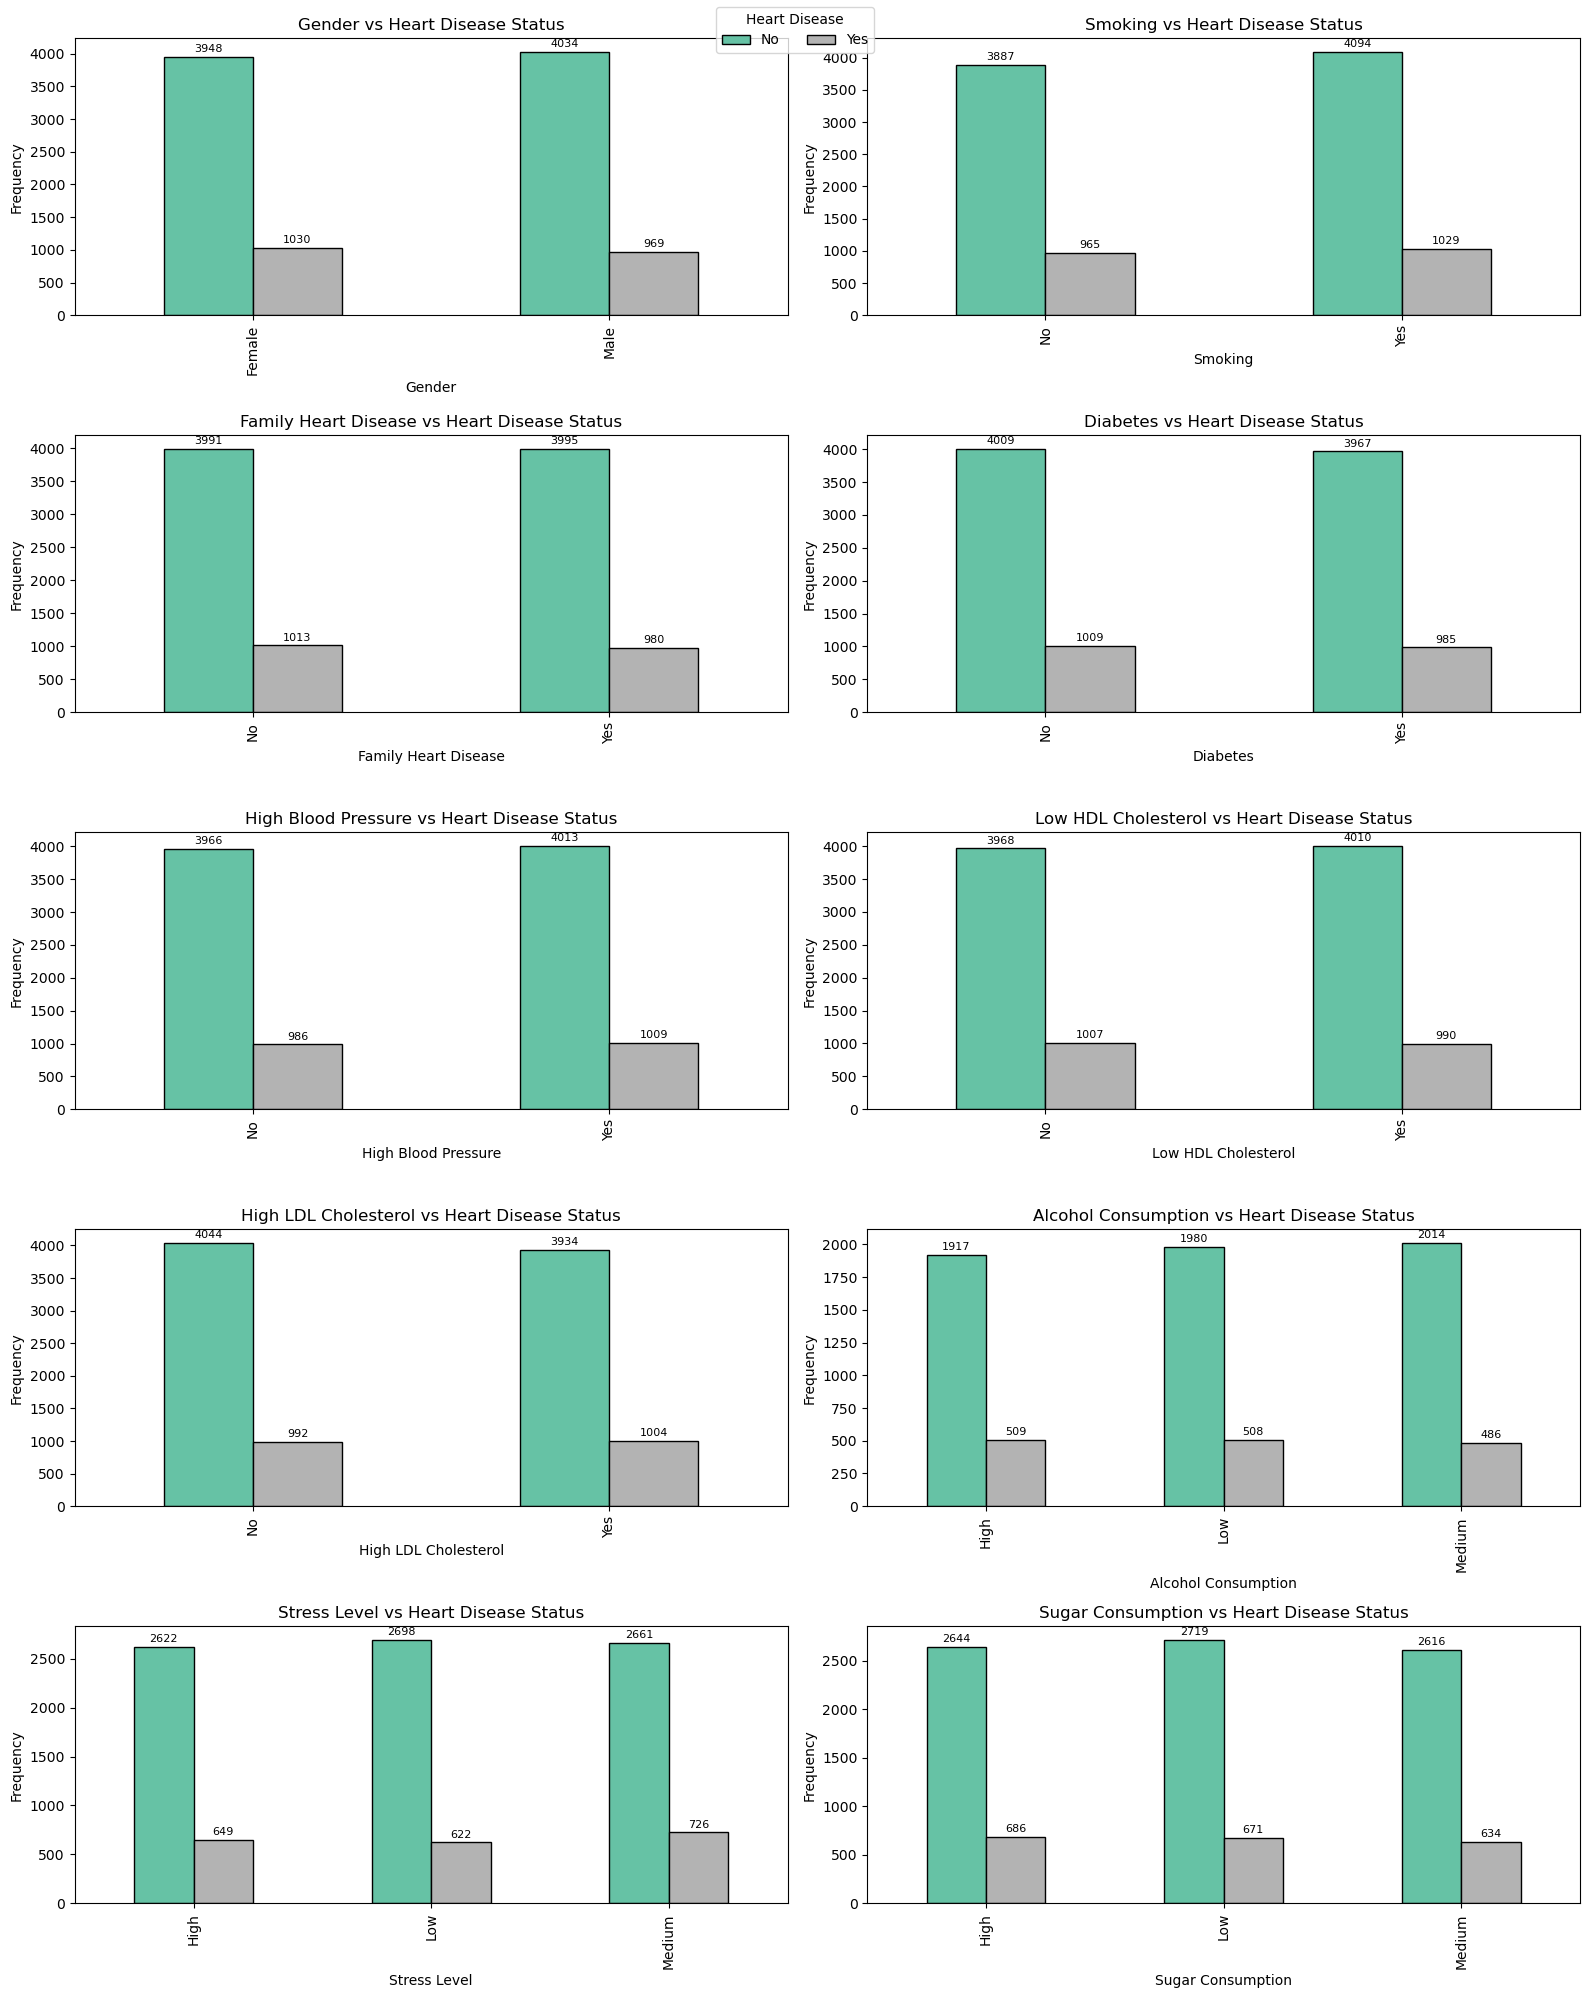

In [38]:
columns = [
    'Gender', 'Smoking', 'Family Heart Disease', 'Diabetes',
    'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
    'Alcohol Consumption', 'Stress Level', 'Sugar Consumption'
]

# Create subplot grid (e.g., 5 rows × 2 columns = 10 plots)
fig, axes = plt.subplots(5, 2, figsize=(16, 20))
axes = axes.flatten()  # flatten to 1D array for easy indexing

for i, col in enumerate(columns):
    ct = pd.crosstab(df[col], df['Heart Disease Status'])
    ax = ct.plot(kind='bar', edgecolor='black', colormap="Set2", ax=axes[i], legend=False)

    # Add count labels
    for container in ax.containers:
        ax.bar_label(container, label_type="edge", fontsize=8, padding=2)

    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.set_title(f"{col} vs Heart Disease Status")

# Add one legend for all plots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title="Heart Disease", loc="upper center", ncol=2)

plt.tight_layout()  # adjust spacing
plt.savefig("All_Factors_vs_HeartDisease.png", dpi=300, bbox_inches="tight")
plt.show()


# Data Quality Verification

## Detect Null Value

In [39]:
# Detect null values
null_counts = df.isnull().sum()
null_percent = (null_counts / len(df)) * 100

print("=== Null Data Report ===")
print(pd.DataFrame({"Missing Count": null_counts, "Missing %": null_percent.round(2)}))

=== Null Data Report ===
                      Missing Count  Missing %
Age                              29       0.29
Gender                           19       0.19
Blood Pressure                   19       0.19
Cholesterol Level                30       0.30
Exercise Habits                  25       0.25
Smoking                          25       0.25
Family Heart Disease             21       0.21
Diabetes                         30       0.30
BMI                              22       0.22
High Blood Pressure              26       0.26
Low HDL Cholesterol              25       0.25
High LDL Cholesterol             26       0.26
Alcohol Consumption            2586      25.86
Stress Level                     22       0.22
Sleep Hours                      25       0.25
Sugar Consumption                30       0.30
Triglyceride Level               26       0.26
Fasting Blood Sugar              22       0.22
CRP Level                        26       0.26
Homocysteine Level               20

## Detect Duplicate Row

In [40]:
# Detect duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Optionally view duplicates
duplicates = df[df.duplicated()]
print(duplicates)

Number of duplicate rows: 0
Empty DataFrame
Columns: [Age, Gender, Blood Pressure, Cholesterol Level, Exercise Habits, Smoking, Family Heart Disease, Diabetes, BMI, High Blood Pressure, Low HDL Cholesterol, High LDL Cholesterol, Alcohol Consumption, Stress Level, Sleep Hours, Sugar Consumption, Triglyceride Level, Fasting Blood Sugar, CRP Level, Homocysteine Level, Heart Disease Status]
Index: []

[0 rows x 21 columns]


## Detect Outlier

In [41]:
df = pd.read_csv("heart_disease.csv")

# Select numeric features only
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Compute Z-scores
z_scores = np.abs(zscore(numeric_df, nan_policy='omit'))

# Flag outliers (Z > 3)
outliers = (z_scores > 3).any(axis=1)

print(f"Number of outlier rows detected: {outliers.sum()}")

# Optionally display outlier rows
print(df[outliers])

Number of outlier rows detected: 0
Empty DataFrame
Columns: [Age, Gender, Blood Pressure, Cholesterol Level, Exercise Habits, Smoking, Family Heart Disease, Diabetes, BMI, High Blood Pressure, Low HDL Cholesterol, High LDL Cholesterol, Alcohol Consumption, Stress Level, Sleep Hours, Sugar Consumption, Triglyceride Level, Fasting Blood Sugar, CRP Level, Homocysteine Level, Heart Disease Status]
Index: []

[0 rows x 21 columns]


# Data Selection

In [42]:
#------------------Data Selection-------------------

df = pd.read_csv("heart_disease.csv")

target = "Heart Disease Status"

all_feature = df.drop(columns=[target])  # all features
selected_features = all_feature.columns.tolist()

# Subset dataframe
df_selected = df[selected_features + [target]].copy()

# Display first rows
df_selected.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


# Data Cleaning

In [43]:
# show the unique value for the each attributes
for feature in df_selected:
  print(f"\nFeatures: {feature}")
  print(df[feature].value_counts(dropna=False))  # shows counts (including NaN if any)
  print(f"Unique values: {df[feature].nunique(dropna=False)}")


missing_values = ["null", "none", "None", "NONE", "NaN"]

# Replace them with NaN
df_selected.replace(missing_values, pd.NA, inplace=True)

# drop the row with the missing value
df_selected.dropna(inplace = True)

print('----------------------------------------------------------------------------------------------------------------------------------------------------------------')

print("--------- Null Value of Each Features ---------")
print(df_selected.isna().sum())

df = df_selected

df


Features: Age
Age
71.0    187
64.0    185
43.0    182
34.0    182
62.0    181
       ... 
60.0    139
24.0    132
44.0    128
48.0    121
NaN      29
Name: count, Length: 64, dtype: int64
Unique values: 64

Features: Gender
Gender
Male      5003
Female    4978
NaN         19
Name: count, dtype: int64
Unique values: 3

Features: Blood Pressure
Blood Pressure
134.0    214
167.0    195
171.0    182
170.0    181
142.0    181
        ... 
179.0    140
131.0    140
130.0    136
156.0    132
NaN       19
Name: count, Length: 62, dtype: int64
Unique values: 62

Features: Cholesterol Level
Cholesterol Level
292.0    91
186.0    84
185.0    83
288.0    83
193.0    81
         ..
157.0    49
239.0    49
169.0    47
218.0    46
NaN      30
Name: count, Length: 152, dtype: int64
Unique values: 152

Features: Exercise Habits
Exercise Habits
High      3372
Medium    3332
Low       3271
NaN         25
Name: count, dtype: int64
Unique values: 4

Features: Smoking
Smoking
Yes    5123
No     4852
NaN   

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
5,25.0,Male,152.0,257.0,Low,Yes,No,No,28.144681,No,...,No,Low,Medium,5.504876,Low,126.0,91.0,4.297575,10.815983,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,68.0,Female,169.0,291.0,Medium,Yes,No,No,22.839718,No,...,No,Medium,Low,6.057509,High,299.0,142.0,3.321020,11.910244,Yes
9994,73.0,Female,144.0,191.0,Medium,Yes,Yes,Yes,39.459620,No,...,No,Medium,Low,7.549114,Medium,200.0,88.0,1.154904,8.021732,Yes
9995,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9998,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes


# Data Construction

In [44]:
# --------------------Data Construction--------------------
def cholesterol_ratio(row):
    low_hdl = row["Low HDL Cholesterol"]
    high_ldl = row["High LDL Cholesterol"]
    tc = row["Cholesterol Level"] #total cholesterol

    if tc < 200:
        tc_bucket = 0   # Normal
    elif tc < 240:
        tc_bucket = 1   # Above Normal
    else:
        tc_bucket = 2   # High

    # Decide ratio based on three columns
    if low_hdl == "Yes" and high_ldl == "Yes":
        return 3 + tc_bucket  # Highest risk
    elif low_hdl == "Yes" and high_ldl == "No":
        return 2 + tc_bucket  # Low HDL + TC
    elif low_hdl == "No" and high_ldl == "Yes":
        return 1 + tc_bucket  # High LDL + TC
    else:
        return tc_bucket      # Normal only influenced by TC

df.loc[:, "Cholesterol Ratio"] = df.apply(cholesterol_ratio, axis=1)
df["Cholesterol Ratio"] = df["Cholesterol Ratio"].astype(object)

print(df[["Low HDL Cholesterol", "High LDL Cholesterol", "Cholesterol Level"]])
df = df.drop(["Low HDL Cholesterol", "High LDL Cholesterol", "Cholesterol Level"], axis = 1)
df["Cholesterol Ratio"]

     Low HDL Cholesterol High LDL Cholesterol  Cholesterol Level
1                    Yes                   No              286.0
2                    Yes                  Yes              216.0
3                     No                  Yes              293.0
4                     No                   No              242.0
5                     No                   No              257.0
...                  ...                  ...                ...
9992                 Yes                   No              291.0
9994                  No                   No              191.0
9995                  No                  Yes              243.0
9998                  No                  Yes              299.0
9999                 Yes                  Yes              193.0

[7067 rows x 3 columns]


1       4
2       4
3       3
4       2
5       2
       ..
9992    4
9994    0
9995    3
9998    3
9999    3
Name: Cholesterol Ratio, Length: 7067, dtype: object

In [45]:
def sleep_score(hours):
    if 7 <= hours <= 9:
        return 2
    elif 5 <= hours < 7 or 9 < hours <= 11:
        return 1
    else:
        return 0

def exercise_score(exercise):
    if exercise == "High":
        return 2
    elif exercise == "Medium":
        return 1
    else:
        return 0

def smoking(habit):
    if habit == "No":
        return 2
    elif habit == "Yes":
        return 0
    else:
        return 2

def stress_score(level):
    if level == "Low":
        return 2
    elif level == "Medium":
        return 1
    else:
        return 0

# Apply to DataFrame
df["Sleep Hours"] = df["Sleep Hours"].apply(sleep_score)
df["Exercise Habits"] = df["Exercise Habits"].apply(exercise_score)
df["Smoking"] = df["Smoking"].apply(smoking)
df["Stress Level"] = df["Stress Level"].apply(stress_score)

# Lifestyle Index
df["Lifestyle_Index"] = df["Sleep Hours"] + df["Exercise Habits"] + df["Smoking"] + df["Stress Level"]
df["Lifestyle_Index"] = df["Lifestyle_Index"]

df = df.drop(["Sleep Hours", "Exercise Habits", "Smoking", "Stress Level"], axis = 1)

df

,Age,Gender,Blood Pressure,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Alcohol Consumption,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status,Cholesterol Ratio,Lifestyle_Index
1,69.0,Female,146.0,Yes,Yes,25.221799,No,Medium,Medium,133.0,157.0,9.355389,19.298875,No,4,6
2,46.0,Male,126.0,No,No,29.855447,No,Low,Low,393.0,92.0,12.709873,11.230926,No,4,4
3,32.0,Female,122.0,Yes,No,24.130477,Yes,Low,High,293.0,94.0,12.509046,5.961958,No,3,3
4,60.0,Male,166.0,Yes,Yes,20.486289,Yes,Low,High,263.0,154.0,10.381259,8.153887,No,2,2
5,25.0,Male,152.0,No,No,28.144681,No,Low,Low,126.0,91.0,4.297575,10.815983,No,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,68.0,Female,169.0,No,No,22.839718,No,Medium,High,299.0,142.0,3.321020,11.910244,Yes,4,4
9994,73.0,Female,144.0,Yes,Yes,39.459620,No,Medium,Medium,200.0,88.0,1.154904,8.021732,Yes,0,5
9995,25.0,Female,136.0,No,No,18.788791,Yes,Medium,Medium,343.0,133.0,3.588814,19.132004,Yes,3,2
9998,23.0,Male,142.0,No,Yes,34.964026,Yes,Medium,Medium,113.0,153.0,7.215634,11.873486,Yes,3,2


# Normalization

In [46]:
# -------------------------------------------------------------------------normalize the data-------------------------------------------------------------------------

# show the numeric data that need to normalize

numeric_cols = [
    "Age",
    "Blood Pressure",
    "BMI",
    "Triglyceride Level",
    "Fasting Blood Sugar",
    "CRP Level",
    "Homocysteine Level",
    "Lifestyle_Index"
]
# normalize the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

joblib.dump(scaler, "scaler.pkl")

df[numeric_cols]

,Age,Blood Pressure,BMI,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Lifestyle_Index
1,0.822581,0.433333,0.328093,0.110000,0.9625,0.623548,0.953311,0.750
2,0.451613,0.100000,0.538811,0.976667,0.1500,0.847382,0.415312,0.500
3,0.225806,0.033333,0.278465,0.643333,0.1750,0.833981,0.063959,0.375
4,0.677419,0.766667,0.112744,0.543333,0.9250,0.692001,0.210125,0.250
5,0.112903,0.533333,0.461013,0.086667,0.1375,0.286057,0.387642,0.250
...,...,...,...,...,...,...,...,...
9992,0.806452,0.816667,0.219767,0.663333,0.7750,0.220894,0.460611,0.500
9994,0.887097,0.400000,0.975565,0.333333,0.1000,0.076357,0.201312,0.625
9995,0.112903,0.266667,0.035550,0.810000,0.6625,0.238763,0.942183,0.250
9998,0.080645,0.366667,0.771125,0.043333,0.9125,0.480769,0.458160,0.250


# Encoding

## Label & One-Hot Encoding

In [47]:
# Columns for one-hot encoding
onehot_cols = ["Sugar Consumption", "Alcohol Consumption"]

# Columns for label encoding (all categorical except the ones above)
cat_cols = df.select_dtypes(include=["object", "category"]).columns
label_cols = [col for col in cat_cols if col not in onehot_cols]

# Dictionary to store label encoders
label_encoders = {}

# Apply label encoding
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # convert to str just in case
    label_encoders[col] = le

# Apply one-hot encoding
df = pd.get_dummies(df, columns=onehot_cols, drop_first=False, dtype=int)

print("Label encoded columns:", label_cols)
print("One-hot encoded columns:", onehot_cols)
df.head()

joblib.dump(label_encoders, "label_encoders.pkl")

Label encoded columns: ['Gender', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 'Heart Disease Status', 'Cholesterol Ratio']
One-hot encoded columns: ['Sugar Consumption', 'Alcohol Consumption']


['label_encoders.pkl']

# Data Decomposition using PCA

Original feature count: 19
Reduced feature count (PCA): 16

Explained variance by each PC:
[0.08313338 0.07921985 0.07882633 0.07552407 0.05612704 0.05504591
 0.05430662 0.05402647 0.05384018 0.05359832 0.05244612 0.05187863
 0.05142856 0.05104998 0.05066791 0.04967016]


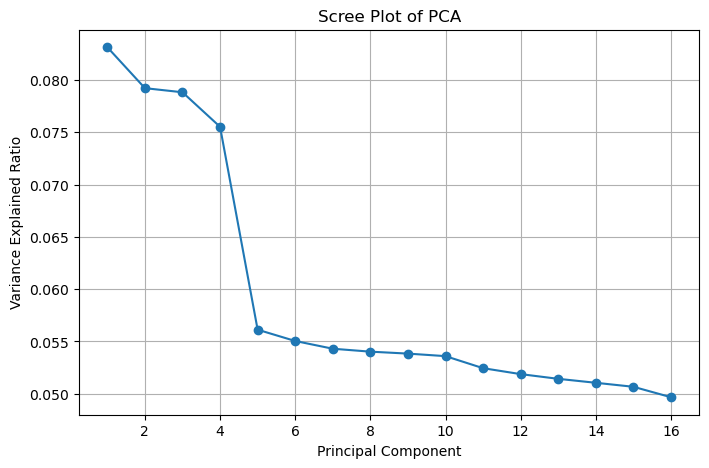

In [48]:
# Assume df is your processed dataset
X = df.drop("Heart Disease Status", axis=1)
y = df["Heart Disease Status"]

# Standardize features before PCA (important!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA - keep enough components to explain ~95% of variance
pca = PCA(n_components=0.95, random_state=42)  # keeps PCs that explain 95% variance
X_pca = pca.fit_transform(X_scaled)

print("Original feature count:", X.shape[1])
print("Reduced feature count (PCA):", X_pca.shape[1])

# Explained variance ratio
print("\nExplained variance by each PC:")
print(pca.explained_variance_ratio_)

# Scree plot (variance explained by each component)
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained Ratio")
plt.title("Scree Plot of PCA")
plt.grid(True)
plt.show()

In [49]:
# Display loadings (contributions of each feature to the principal components)
pca_loadings = pd.DataFrame(pca.components_, columns=X.columns, index=[f"PC{i+1}" for i in range(len(pca.components_))])

print("PCA Component Loadings (Contributions of Original Features to Each PC):")
print(pca_loadings)

# Check the most contributing features to each PC
for i in range(len(pca.components_)):
    print(f"\nLeast features for PC{i+1}:")
    top_features_pc = pca_loadings.iloc[i].abs().sort_values(ascending=True)

    # Show the 10 least most contributing features
    print(top_features_pc.head(10))

PCA Component Loadings (Contributions of Original Features to Each PC):
           Age    Gender  Blood Pressure  Family Heart Disease  Diabetes  \
PC1   0.055671 -0.036788       -0.006716              0.019177  0.008173   
PC2   0.018192 -0.012978        0.041543             -0.040366 -0.011644   
PC3  -0.013000 -0.052708       -0.019713             -0.022457 -0.031866   
PC4   0.007135 -0.023112       -0.013936             -0.005834 -0.034561   
PC5   0.307280 -0.107415       -0.233983             -0.130849 -0.053854   
PC6  -0.170492 -0.254231        0.053260              0.348650 -0.426386   
PC7  -0.019511 -0.210073       -0.472139              0.216375 -0.412914   
PC8   0.201833  0.306785        0.038965              0.184972  0.267402   
PC9  -0.118633  0.585992       -0.468241             -0.199629 -0.315617   
PC10  0.520554 -0.210159       -0.104677             -0.483769  0.001449   
PC11 -0.252720 -0.192234        0.379899              0.012538 -0.032945   
PC12  0.508966  

# Train-test split

In [50]:
X = df.drop("Heart Disease Status", axis=1)  #features
y = df["Heart Disease Status"]              #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (5653, 19)
Testing set size: (1414, 19)


# Data Balancing

In [51]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(y_train_bal.value_counts())

Before SMOTE:
Heart Disease Status
0    4505
1    1148
Name: count, dtype: int64

After SMOTE:
Heart Disease Status
0    4505
1    4505
Name: count, dtype: int64


# Modelling

## Decsion Tree


--- Decision Tree ---
Accuracy: 0.6449787835926449
Recall: 0.2926829268292683
Precision: 0.2193211488250653
F1-Score: 0.2507462686567164
Confusion Matrix:
 [[828 299]
 [203  84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.73      0.77      1127
           1       0.22      0.29      0.25       287

    accuracy                           0.64      1414
   macro avg       0.51      0.51      0.51      1414
weighted avg       0.68      0.64      0.66      1414



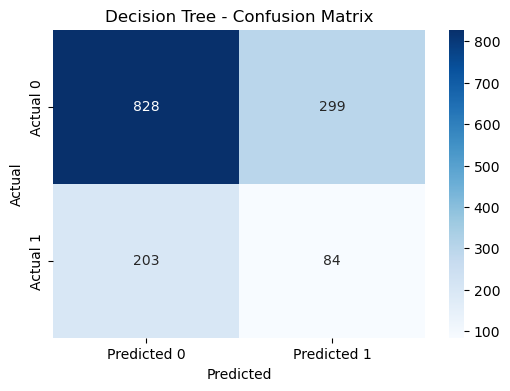

In [52]:
dt_model = DecisionTreeClassifier(class_weight="balanced", random_state=42)
dt_model.fit(X_train_bal, y_train_bal)

y_pred = dt_model.predict(X_test)

print("\n--- Decision Tree ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['0', '1']))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Decision Tree - Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

# Initialize model
dt = DecisionTreeClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='f1',  # or 'recall' to focus on minority class
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_search.fit(X_train_bal, y_train_bal)

# Best parameters
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


In [ ]:
best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("F1-score:", f1_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best, target_names=['0', '1']))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Decision Tree - Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


## Extreme Gradient Boosting

C:\Users\ACER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:29:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ACER\AppData\Local\Temp\ipykernel_1692\906252699.py:24: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  pr_auc = np.trapz(prec_curve, rec_curve)


=== XGBoost Results (Test Set) ===
Accuracy : 0.7482
Precision: 0.2518
Recall   : 0.1220
F1-score : 0.1643
=== Classification Report ===
              precision    recall  f1-score   support

           0     0.8024    0.9077    0.8518      1127
           1     0.2518    0.1220    0.1643       287

    accuracy                         0.7482      1414
   macro avg     0.5271    0.5148    0.5081      1414
weighted avg     0.6906    0.7482    0.7123      1414



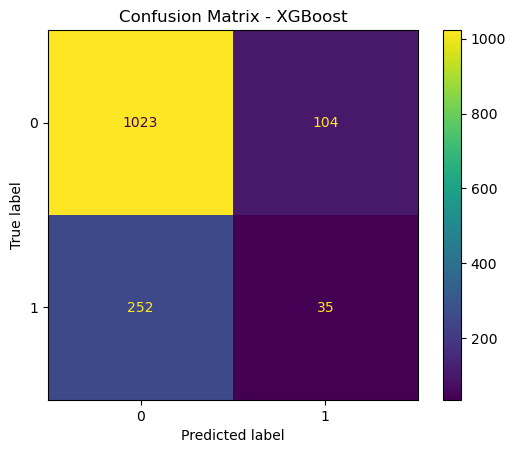

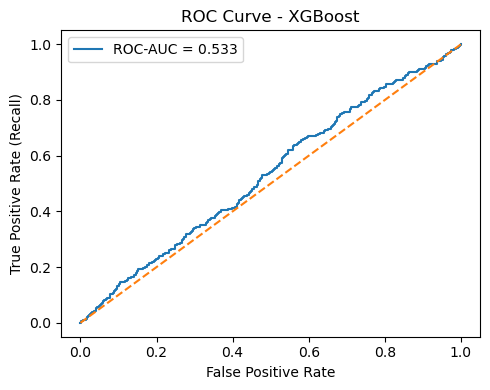

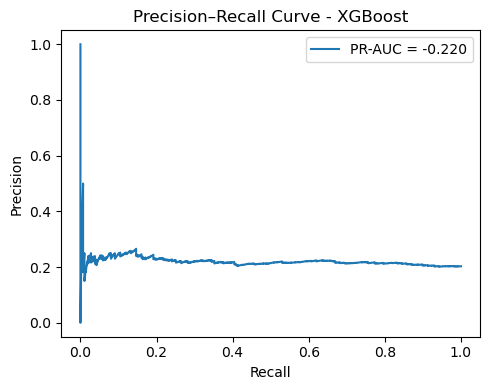


=== Top Features (by importance) ===
Lifestyle_Index: 0.3786
Gender: 0.0418
Age: 0.0378
CRP Level: 0.0375
Alcohol Consumption_High: 0.0374
Sugar Consumption_Medium: 0.0368
Homocysteine Level: 0.0364
Blood Pressure: 0.0363
BMI: 0.0362
Sugar Consumption_Low: 0.0357
Triglyceride Level: 0.0345
Fasting Blood Sugar: 0.0344
Alcohol Consumption_Medium: 0.0341
Diabetes: 0.0331
Cholesterol Ratio: 0.0327
Family Heart Disease: 0.0317
High Blood Pressure: 0.0298
Alcohol Consumption_Low: 0.0289
Sugar Consumption_High: 0.0265


In [53]:

# ================== 1) Train XGBoost Classifier ==================
xgb_clf = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',  # required in newer versions
)

# Fit on SMOTE-balanced training data
xgb_clf.fit(X_train_bal, y_train_bal)

# ================== 2) Predictions ==================
y_pred = xgb_clf.predict(X_test)
y_proba = xgb_clf.predict_proba(X_test)[:, 1]

# ================== 3) Metrics ==================
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec  = recall_score(y_test, y_pred, zero_division=0)
f1   = f1_score(y_test, y_pred, zero_division=0)
roc  = roc_auc_score(y_test, y_proba)

# PR-AUC
prec_curve, rec_curve, _ = precision_recall_curve(y_test, y_proba)
pr_auc = np.trapz(prec_curve, rec_curve)

print("=== XGBoost Results (Test Set) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
#print(f"ROC-AUC  : {roc:.4f}")
#print(f"PR-AUC   : {pr_auc:.4f}\n")

print("=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))

# ================== 4) Confusion Matrix ==================
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title("Confusion Matrix - XGBoost")
plt.show()

# ================== 5) ROC Curve ==================
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.tight_layout()
plt.show()

# ================== 6) Precision–Recall Curve ==================
plt.figure(figsize=(5,4))
plt.plot(rec_curve, prec_curve, label=f"PR-AUC = {pr_auc:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve - XGBoost")
plt.legend()
plt.tight_layout()
plt.show()

# ================== 7) Feature Importances ==================
importances = xgb_clf.feature_importances_
feat_order = np.argsort(importances)[::-1]

print("\n=== Top Features (by importance) ===")
for i in feat_order[:20]:
    print(f"{X_train.columns[i]}: {importances[i]:.4f}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, average_precision_score, classification_report,
                             precision_recall_curve, roc_curve, confusion_matrix, ConfusionMatrixDisplay)
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

# ================== Hyperparameter Search Space ==================
from scipy.stats import uniform, randint

param_dist = {
    "n_estimators": randint(500, 800),       # number of trees
    "learning_rate": uniform(0.05, 0.15),    # ~0.02 - 0.17
    "max_depth": randint(4, 8),              # depth of base learners
    "subsample": uniform(0.7, 0.3),          # 0.7 - 1.0  (stochastic GB)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# IMPORTANT: Use a metric that reflects your goal on imbalanced data.
search = RandomizedSearchCV(
    estimator=XGBClassifier(objective="binary:logistic", eval_metric="logloss", random_state=42),
    param_distributions=param_dist,
    n_iter=40,
    scoring="recall",              # prioritize recall for model selection
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# ================== Fit the Search on SMOTE-Balanced Train ==================
search.fit(X_train_bal, y_train_bal)  # No need to re-prepare data, assuming X_train_bal and y_train_bal are ready
best_gb = search.best_estimator_

print("\n=== Best Parameters (RandomizedSearchCV) ===")
print(search.best_params_)
print(f"Best CV {search.scoring}: {search.best_score_:.4f}")

# ================== Evaluate on Test Set (default threshold 0.5) ==================
y_proba = best_gb.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

# Metrics calculation
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec  = recall_score(y_test, y_pred, zero_division=0)
f1   = f1_score(y_test, y_pred, zero_division=0)
roc  = roc_auc_score(y_test, y_proba)

# ================== Precision-Recall Curve ==================
prec_curve, rec_curve, thresholds = precision_recall_curve(y_test, y_proba)

# PR-AUC via trapezoid (recall is x-axis)
pr_auc = np.trapz(prec_curve, rec_curve)

print("\n=== XGBoost (Tuned) — Test Results ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC-AUC  : {roc:.4f}")
print(f"PR-AUC   : {pr_auc:.4f}\n")

print("=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))

# ================== Confusion Matrix ==================
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title("Confusion Matrix - XGBoost (Tuned)")
plt.show()

# ================== ROC Curve ==================
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - GB (Tuned)")
plt.legend()
plt.tight_layout()
plt.show()

# ================== Precision-Recall Curve ==================
plt.figure(figsize=(5,4))
plt.plot(rec_curve, prec_curve, label=f"PR-AUC = {pr_auc:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve - GB (Tuned)")
plt.legend()
plt.tight_layout()
plt.show()

# ================== Threshold Optimization (Maximize Recall with Precision Floor) ==================

# Set a strict precision floor
precision_floor = 0.25

# Consider only thresholds-aligned points (exclude last PR point with no threshold)
valid_mask = prec_curve[:-1] >= precision_floor

if not np.any(valid_mask):
    raise ValueError(
        f"No operating threshold achieves precision ≥ {precision_floor:.2f}.\n"
        "Consider lowering the precision_floor or improving the model."
    )

# Among candidates meeting the floor, pick the one with the highest recall
cand_idx = np.where(valid_mask)[0]
best_idx = cand_idx[np.argmax(rec_curve[cand_idx])]
best_threshold = thresholds[best_idx]

# Apply tuned threshold
pred_tuned = (y_proba >= best_threshold).astype(int)

# Report metrics with the chosen threshold
acc2  = accuracy_score(y_test, pred_tuned)
prec2 = precision_score(y_test, pred_tuned, zero_division=0)
rec2  = recall_score(y_test, pred_tuned, zero_division=0)
f12   = f1_score(y_test, pred_tuned, zero_division=0)
roc2  = roc_auc_score(y_test, y_proba)
pra2  = average_precision_score(y_test, y_proba)

print(f"\nChosen threshold (precision ≥ {precision_floor:.2f}): {best_threshold:.4f}")
print("=== XGB (Recall-optimised, strict precision floor) ===")
print(f"Accuracy : {acc2:.4f}")
print(f"Precision: {prec2:.4f}")
print(f"Recall   : {rec2:.4f}")
print(f"F1-score : {f12:.4f}")
print(f"ROC-AUC  : {roc2:.4f}")
print(f"PR-AUC   : {pra2:.4f}\n")

print("=== Classification Report (tuned threshold) ===")
print(classification_report(y_test, pred_tuned, digits=4))

# ================== Feature Importances ==================
importances = best_gb.feature_importances_
order = np.argsort(importances)[::-1]
print("\n=== Top Features (by importance) ===")
for i in order[:20]:
    print(f"{X_train.columns[i]}: {importances[i]:.4f}")

## ANN

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--- Artificial Neural Network (ANN) ---
Accuracy: 0.6039603960396039
Recall: 0.3623693379790941
Precision: 0.21621621621621623
F1-Score: 0.2708333333333333
Confusion Matrix:
 [[750 377]
 [183 104]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.67      0.73      1127
           1       0.22      0.36      0.27       287

    accuracy                           0.60      1414
   macro avg       0.51      0.51      0.50      1414
weighted avg       0.68      0.60      0.64      1414



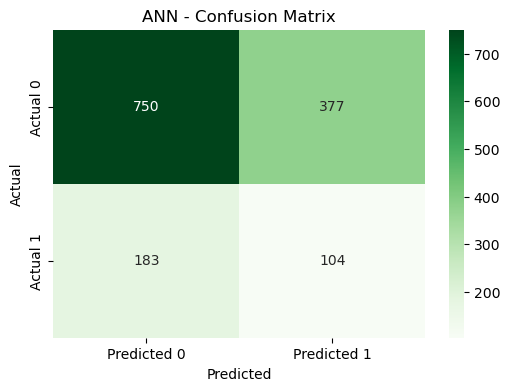

In [54]:
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    max_iter=200,            # train 1 step at a time
    random_state=42
)

mlp.fit(X_train_bal, y_train_bal)

y_pred = mlp.predict(X_test)

# Evaluate performance
print("\n--- Artificial Neural Network (ANN) ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['0', '1']))

joblib.dump(mlp, "model.pkl")

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("ANN - Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [30]:
# ----------------------------- DEFINE PARAMETER GRID -----------------------------
param_grid = {
    'hidden_layer_sizes': [(64,),(100,), (128,), (128,64), (256,128)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'max_iter': [200, 300, 400]
}

# ----------------------------- GRID SEARCH -----------------------------
mlp = MLPClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    cv=5,   # 5-fold cross-validation
    scoring='recall',
    n_jobs=-1,  # use all CPU cores
    verbose=2
)

grid_search.fit(X_train_bal, y_train_bal)

# ----------------------------- BEST PARAMS -----------------------------
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# ----------------------------- TRAIN WITH BEST PARAM -----------------------------
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test)

# ----------------------------- EVALUATION -----------------------------
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (256, 128), 'max_iter': 200, 'solver': 'adam'}
Best Cross-Validation Score: 0.8805771365149834
Test Accuracy: 0.6449787835926449
Confusion Matrix:
 [[847 280]
 [222  65]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77      1127
           1       0.19      0.23      0.21       287

    accuracy                           0.64      1414
   macro avg       0.49      0.49      0.49      1414
weighted avg       0.67      0.64      0.66      1414



## Random Forest

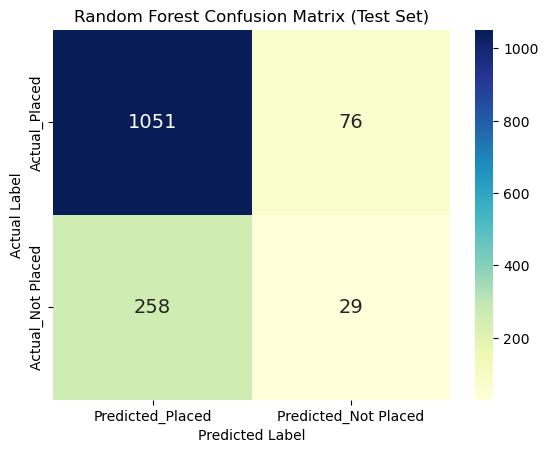

Random Forest Metrics:
      Metric  Score
0   Accuracy  0.764
1  Precision  0.540
2     Recall  0.517
3   F1-Score  0.505
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      1127
           1       0.28      0.10      0.15       287

    accuracy                           0.76      1414
   macro avg       0.54      0.52      0.51      1414
weighted avg       0.70      0.76      0.72      1414



In [55]:
Random_Forest = RandomForestClassifier(class_weight="balanced",random_state=42)
Random_Forest.fit(X_train_bal, y_train_bal)
y_pred_rf = Random_Forest.predict(X_test)


# Confusion Matrix
rf_cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(rf_cm,
            xticklabels=['Predicted_Placed', 'Predicted_Not Placed'],
            yticklabels=['Actual_Placed', 'Actual_Not Placed'],
            annot=True, fmt='d', cmap="YlGnBu", annot_kws={'fontsize': 14})
plt.title("Random Forest Confusion Matrix (Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

print("Random Forest Metrics:")
print(pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Score": [
        round(accuracy_score(y_test, y_pred_rf), 3),
        round(precision_score(y_test, y_pred_rf, average='macro'), 3),
        round(recall_score(y_test, y_pred_rf, average='macro'), 3),
        round(f1_score(y_test, y_pred_rf, average='macro'), 3)
    ]
}))
print("Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=['0', '1']))


In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                # 5-fold cross validation
    scoring='accuracy',  # optimize for accuracy
    n_jobs=-1,
    verbose=2
)

# Fit grid search on training set
grid_search.fit(X_train_bal, y_train_bal)
# Best parameters
print("Best parameters found:", grid_search.best_params_)
y_pred = grid_search.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", test_accuracy)

In [ ]:
Random_Forest = RandomForestClassifier(**grid_search.best_params_, random_state=42)
Random_Forest.fit(X_train_bal, y_train_bal)
y_pred_rf = Random_Forest.predict(X_test)

# Confusion Matrix
rf_cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(rf_cm,
            xticklabels=['Predicted_No_Disease', 'Predicted_Disease'],
            yticklabels=['Actual_No_Disease', 'Actual_Disease'],
            annot=True, fmt='d', cmap="YlGnBu", annot_kws={'fontsize': 14})
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

print("Random Forest Metrics:")
print(pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Score": [
        round(accuracy_score(y_test, y_pred_rf), 3),
        round(precision_score(y_test, y_pred_rf, average='macro'), 3),
        round(recall_score(y_test, y_pred_rf, average='macro'), 3),
        round(f1_score(y_test, y_pred_rf, average='macro'), 3)
    ]
}))
print("Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=['0', '1']))


In [ ]:
# Random Forest Feature Importances
importances_rf = pd.Series(Random_Forest.feature_importances_, index=X_train.columns)
importances_rf = importances_rf.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
importances_rf.plot(kind='barh', title='Feature Importances (Random Forest)')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Model Evaluation Plot

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and metrics (replace with actual data)
models = ['Decision Tree', 'XGBoost', 'ANN', 'Random Forest']
accuracy = [66.83, 69.66, 64.50, 76.90]  # Accuracy percentages
recall = [18.12, 19.51, 22.65, 11.00]    # Minority class recall percentages
f1_score = [18.15, 20.70, 20.57, 17.00]  # Minority class F1-score percentages

# Function to create and save a bar chart
def plot_bar_chart(data, title, ylabel, filename):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(models, data, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d488da'])
    ax.set_title(title, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_xlabel('Model', fontsize=12)
    ax.set_ylim(0, 100)  # Assuming percentages (0-100%)

    # Add value labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%',
                ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

# Plot and save accuracy chart
plot_bar_chart(accuracy, 'Accuracy Comparison Across Models', 'Accuracy (%)', 'accuracy_comparison.png')

# Plot and save recall chart
plot_bar_chart(recall, 'Recall Comparison Across Models', 'Positive Class Recall (%)', 'recall_comparison.png')

# Plot and save F1-score chart
plot_bar_chart(f1_score, 'F1-Score Comparison Across Models', 'Positive Class F1-Score (%)', 'f1_score_comparison.png')

# App.py

In [1]:
%%writefile app.py
import pandas as pd
import streamlit as st
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

# Load trained model
model = joblib.load("model.pkl")
scaler = joblib.load("scaler.pkl")          
label_encoders = joblib.load("label_encoders.pkl")


st.set_page_config(page_title="Heart Disease Prediction", page_icon="❤️", layout="centered")

st.title("❤️ Heart Disease Prediction App")
st.write("Enter your health and lifestyle details to predict the risk of Heart Disease.")

# ------------------ User Inputs ------------------
st.subheader("🧍 Personal Info")
age = st.number_input("Age", 1, 120, 40)
gender = st.selectbox("Gender", ["Male", "Female"])
st.subheader("🧪 Medical Data")
bp = st.number_input("Blood Pressure", 80, 200, 120)
family_hd = st.selectbox("Family Heart Disease", ["No", "Yes"])
diabetes = st.selectbox("Diabetes", ["No", "Yes"])
bmi = st.number_input("BMI", 10.0, 45.0, 25.0, 0.1)
hbp = st.selectbox("High Blood Pressure", ["No", "Yes"])
triglyceride = st.number_input("Triglyceride Level mg/dl", 50, 500, 150)
fbs = st.number_input("Fasting Blood Sugar mg/dl", 50, 200, 100)
crp = st.number_input("CRP Level mg/L", 0.0, 20.0, 1.0, 0.1)
homocysteine = st.number_input("Homocysteine Level μmol/L", 0.0, 40.0, 10.0, 0.1)

chol_tc = st.number_input("Total Cholesterol mg/dl", 100, 400, 200)
low_hdl = st.selectbox("Low HDL Cholesterol", ["No", "Yes"])
high_ldl = st.selectbox("High LDL Cholesterol", ["No", "Yes"])

st.subheader("🏃Daily Routine")
sleep_hours = st.slider("Sleep Hours", 0, 12, 7)
exercise = st.selectbox("Exercise Habits", ["Low", "Medium", "High"])
smoking = st.selectbox("Smoking", ["No", "Yes"])
stress = st.selectbox("Stress Level", ["Low", "Medium", "High"])
st.subheader("🍬🍺Sugar&Alcohol Intake")
sugar = st.selectbox("Sugar Consumption", ["Low", "Medium", "High"])
alcohol = st.selectbox("Alcohol Consumption", ["Low", "Medium", "High"])

# ------------------ Preprocessing Functions ------------------
def cholesterol_ratio(tc, low_hdl, high_ldl):
    if tc < 200:
        tc_bucket = 0
    elif tc < 240:
        tc_bucket = 1
    else:
        tc_bucket = 2

    if low_hdl == "Yes" and high_ldl == "Yes":
        return 3 + tc_bucket
    elif low_hdl == "Yes" and high_ldl == "No":
        return 2 + tc_bucket
    elif low_hdl == "No" and high_ldl == "Yes":
        return 1 + tc_bucket
    else:
        return tc_bucket

def sleep_score(hours):
    if 7 <= hours <= 9: return 2
    elif 5 <= hours < 7 or 9 < hours <= 11: return 1
    else: return 0

def exercise_score(level): return {"Low":0,"Medium":1,"High":2}[level]
def smoking_score(level): return {"No":2,"Yes":0}[level]
def stress_score(level): return {"Low":2,"Medium":1,"High":0}[level]

# ------------------ Transform Inputs ------------------
# Lifestyle Index
lifestyle_index = sleep_score(sleep_hours) + exercise_score(exercise) + smoking_score(smoking) + stress_score(stress)

# Label encode categorical columns
gender_enc = label_encoders["Gender"].transform([gender])[0]
family_hd_enc = label_encoders["Family Heart Disease"].transform([family_hd])[0]
diabetes_enc = label_encoders["Diabetes"].transform([diabetes])[0]
hbp_enc = label_encoders["High Blood Pressure"].transform([hbp])[0]


# One-hot encode sugar/alcohol
sugar_high = 1 if sugar=="High" else 0
sugar_medium = 1 if sugar=="Medium" else 0
sugar_low = 1 if sugar=="Low" else 0

alcohol_high = 1 if alcohol=="High" else 0
alcohol_medium = 1 if alcohol=="Medium" else 0
alcohol_low = 1 if alcohol=="Low" else 0

# Cholesterol ratio
chol_ratio = cholesterol_ratio(chol_tc, low_hdl, high_ldl)

# ------------------ Construct input DataFrame ------------------
input_df = pd.DataFrame({
    "Age":[age],
    "Gender":[gender_enc],
    "Blood Pressure":[bp],
    "Family Heart Disease":[family_hd_enc],
    "Diabetes":[diabetes_enc],
    "BMI":[bmi],
    "High Blood Pressure":[hbp_enc],
    "Triglyceride Level":[triglyceride],
    "Fasting Blood Sugar":[fbs],
    "CRP Level":[crp],
    "Homocysteine Level":[homocysteine],
    "Cholesterol Ratio":[chol_ratio],
    "Lifestyle_Index":[lifestyle_index],
    "Sugar Consumption_High":[sugar_high],
    "Sugar Consumption_Low":[sugar_low],
    "Sugar Consumption_Medium":[sugar_medium],
    "Alcohol Consumption_High":[alcohol_high],
    "Alcohol Consumption_Low":[alcohol_low],
    "Alcohol Consumption_Medium":[alcohol_medium]
})

# Normalize numeric columns using saved scaler
numeric_cols = ["Age","Blood Pressure","BMI","Triglyceride Level","Fasting Blood Sugar", "CRP Level","Homocysteine Level", "Lifestyle_Index"]
input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])

# ------------------ Prediction ------------------
if st.button("🔍 Predict"):
    prediction = model.predict(input_df)[0]
    if prediction == 1:
        st.error("⚠️ The model predicts: **Heart Disease Detected**")
    else:
        st.success("✅ The model predicts: **No Heart Disease**")

#---------------Visualization---------------
    avg_values = {
        "BMI": 29,
        "Blood Pressure": 150,
        "Triglyceride Level": 250
    }

    user_values = {
        "BMI": bmi,
        "Blood Pressure": bp,
        "Triglyceride Level": triglyceride
    }

    st.subheader("📈 Risk Factor Comparison")
    fig, ax = plt.subplots()
    ax.bar(avg_values.keys(), avg_values.values(), alpha=0.5, label="Average")
    ax.bar(user_values.keys(), user_values.values(), alpha=0.7, label="You")
    ax.set_ylabel("Value")
    ax.legend()
    st.pyplot(fig)

Overwriting app.py
